# Heap Push and Pop

With heaps, you can read the min or max in $O(1)$ time by simply reading the element in the first position. But pushing/popping is more complicated and takes $O(logn)$

## Push

Say we wanted to add a value to our existing binary (min)heap:

1. Add it to the last layer, in the right most possible slot (to maintain the left-to-right contiguous structure property)
2. Check the parent
    - If smaller than parent, then swap itself with the parent (remember for minheaps a parent node is always smaller than its children)
    - If equal or larger than parent, it can remain where it is.
3. Keep repeating this checking/swapping until the right spot - *percolating up*

For e.g. if we wanted to insert 17

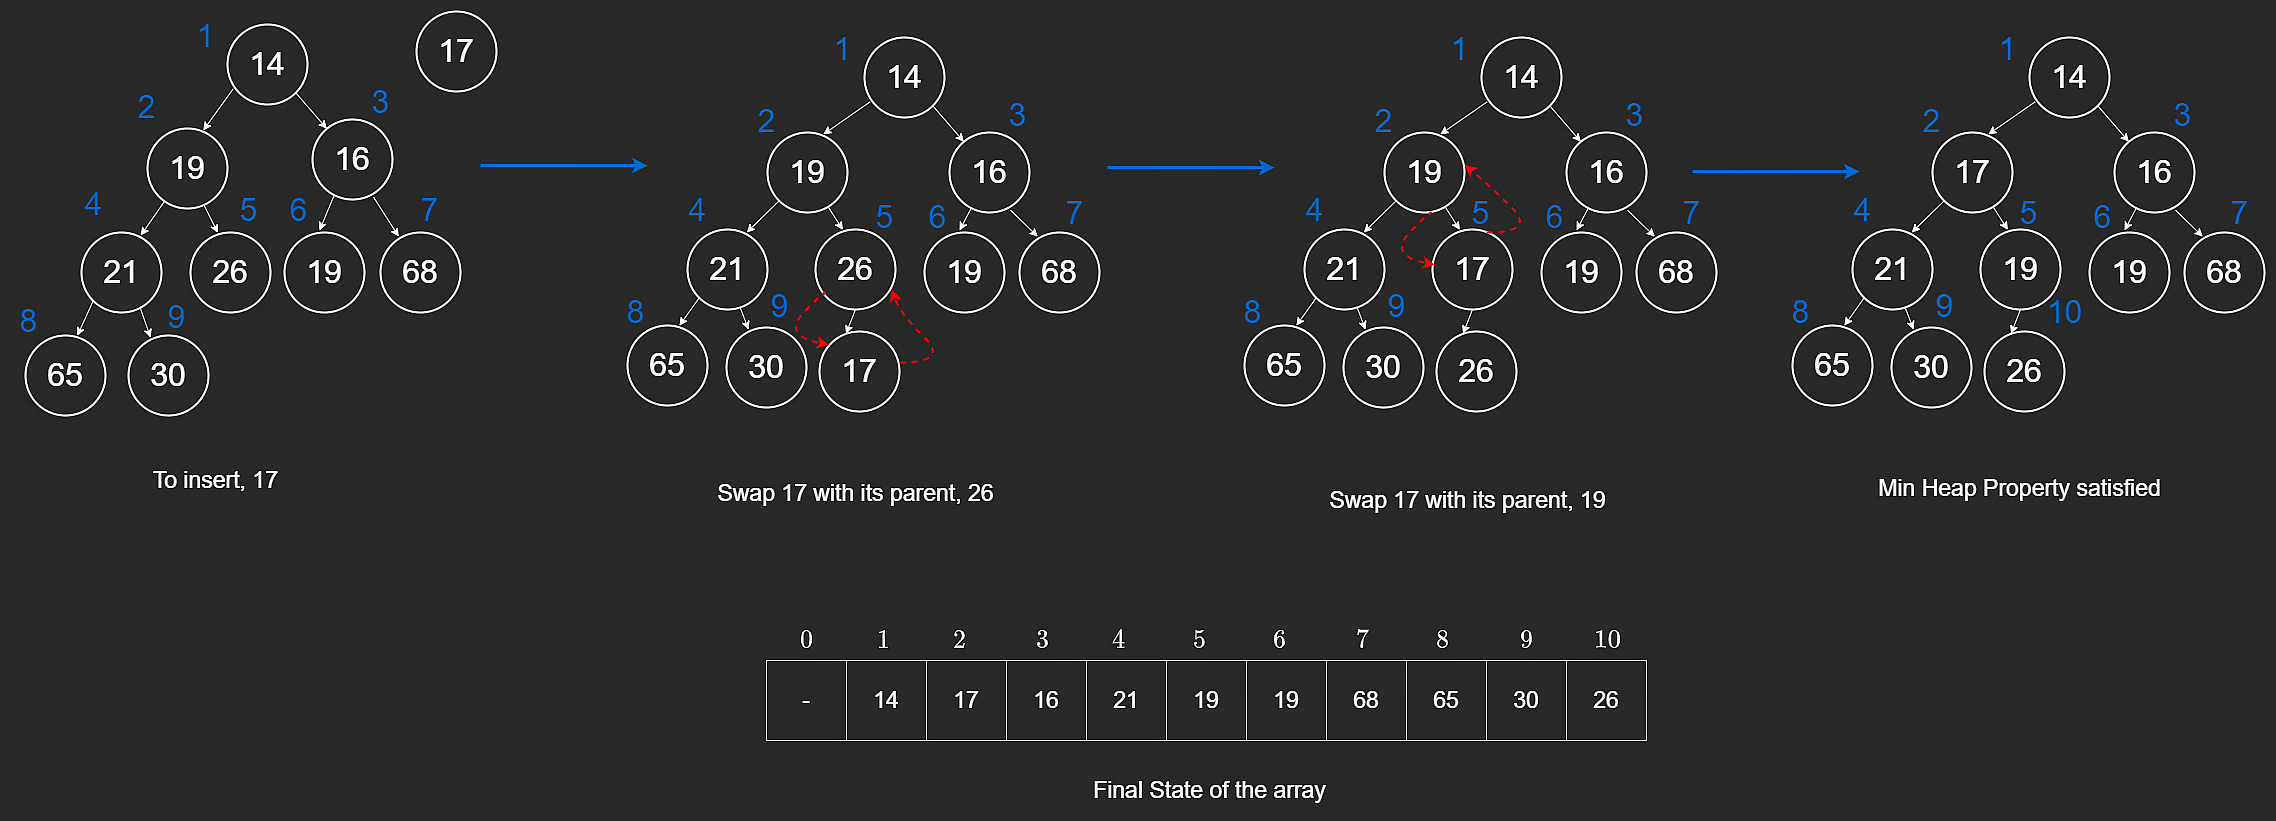

> Since we know for complete binary trees, itll always be balanced, the time complexity of the push operation is $O(log n)$, the height of the tree



In [ ]:
# Min Heap
class Heap:
    def __init__(self):
        self.heap = [0]

    def push(self, val):
        #move to rightmost node of last layer
        self.heap.append(val)
        #initially this i is simply the last index
        i = len(self.heap) - 1

        # Percolate UP
        # while still has parents and the parents are larger than itself
        while i > 1 and self.heap[i] < self.heap[i // 2]:
            #swap the parent with itself (child)
            tmp = self.heap[i]
            self.heap[i] = self.heap[i // 2]
            self.heap[i // 2] = tmp
            #setup the next loop
            i = i // 2

## Pop

popping is to remove the value with the highest priority, `root`. One possible way is to replace `root` with `min(left_child,right_child)`, and continue swapping down. However, if we do this, then we may remove a child node from the second-last lvl, which violates the structure property

The correct solution:

1. Swap the right-most node `last` in the last level with `root` (structure property maintained but not order property)
2. Continue *percolating down* by swapping `parent node` (`last`) with `min(left_child, right_child)` until the correct position
    - this occurs when both its children are equal or greater than the value of `last`
  
> When considering a binary heap, it is not possible to have only a right child because then it no longer is a complete binary tree and violates the structure property.

In [ ]:
def pop(self):
    #empty heap with only one elem
    if len(self.heap) == 1:
        return None
    #heap with only one node; just pop this one
    if len(self.heap) == 2:
        return self.heap.pop()

    #temporarily store the root node
    res = self.heap[1]   

    # Move last value to root, remove in-place and return!
    self.heap[1] = self.heap.pop()

    #start percolating down
    i = 1
    # Percolate down

    #while we at least have a left child; while left child in still in bounds
    while 2 * i < len(self.heap):
        #try the right first
        #1. check if it has a right child
        #2. check if right child smaller than left child
        #3. check if itself is larger than its children
        if 2 * i + 1 < len(self.heap) and self.heap[2 * i + 1] < self.heap[2 * i] and self.heap[i] > self.heap[2 * i + 1]:
        
            # Swap itself with right child
            tmp = self.heap[i]
            self.heap[i] = self.heap[2 * i + 1]
            self.heap[2 * i + 1] = tmp
            i = 2 * i + 1

        # if it has no rightchild, or rightchild is larger than leftchild, then we go to the left
        # check if its larger than leftchild
        elif self.heap[i] > self.heap[2 * i]:
            # Swap left child
            tmp = self.heap[i]
            self.heap[i] = self.heap[2 * i]
            self.heap[2 * i] = tmp
            i = 2 * i
        
        #already in the proper position; like all children smaller/equal, or no children
        else:
            break
    return res


*A very subtle bug*

If you write instead 3 `if` conditionals instead of the 3 `and` statements, then
```python
if 2*i+1 < len(self.heap):
    if self.heap[2*i+1] < self.heap[2*i]:
        if self.heap[i] > self.heap[2*i+1]:
            # Swap with right child
            self.heap[i], self.heap[2*i+1] = self.heap[2*i+1], self.heap[i]
            i = 2*i+1
```

this will end up in a recursive loop. This is since you can get into a situation where only the first and second condition is satisfied, the third `if` isnt satisfied, but it doesnt execute the `elif` or `else` blocks. then, it will keep looping over the same `i` and will never update itself. Very tricky!

## Complexity

| Operation | Big-O Time |
|:----------|:-----------|
| Get Min/Max | O(1) |
| Push | O(log n) |
| Pop | O(log n) |